# Navigation Project

In this proejct, we will present an early approach to DQNs to play a simple game using a UnityEnvironment that simulates a world with yellow and blue bananas. Our agent’s task is to understand the dynamics of this world, by collecting yellow bananas that give +1 Reward as fast as possible, while avoiding blue bananas that give -1 Reward. Without a DQN, we can watch our agent using the equiprobable policy. During that phase we will see that the agent randomly selects actions, making it truly useless.

In this notebook, I used the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

Other imports

In [3]:
import random
import time
from collections import namedtuple, deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn.functional as F
import torch.optim as optim

In [4]:
start = time.time()

In [5]:
from dqn_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [6]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Now we have a link between our notebook and the actual Unity Environment. We can now start interacting with the environment and get feedback by our interactions.

#### Brain
Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(brain)

Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, we try to use the Python API to control the agent and receive feedback from the environment. Once this cell is executed, we can watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [9]:
def play_game(use_DQN = False):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    
    epsilon = 0
    while True:
        # if we play using DQN, the agent will act based on greedy-policy of the state
        # otherwise we use the equiprobable policy to select randomly any of the available actions
        action = np.int32(agent.act(state, epsilon)) if use_DQN else np.random.randint(action_size)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    
    print("Score: {}".format(score))

In [10]:
play_game(use_DQN = False)

Score: 0.0


### 4. Interacting with the Environment to learn

At this stage, we will put everything together so we can interact with the environment for several episodes, until we come up with a good policy estimation via our DQN network, and eventually solve the RL task. We will define a function DQN which will put everything together and drive the learning through interaction. 

In [11]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end   (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    moving_avgs = []                   # list of moving averages
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        state = env_info.vector_observations[0]           # get current state
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]       # send action to environment
            next_state = env_info.vector_observations[0]  # get next state
            reward = env_info.rewards[0]                  # get reward
            done = env_info.local_done[0]                 # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores.append(score)                # save score for plotting
        scores_window.append(score)         # save score for moving average
        moving_avg = np.mean(scores_window) # calculate moving average
        moving_avgs.append(moving_avg)      # save moving average
        eps = max(eps_end, eps_decay*eps)   # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg))
            
        if moving_avg >= 13.10:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avg))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores, moving_avgs

Our DQN method will run for a maximum of 2000 episodes, after which if we have not reached our desired per 100 episodes score, the method will terminate. 
In a nutshell, at every episode we will 
* Reset the environment 
* For each state, loop by getting the current state 
    * Follow the epsilon-greedy-policy so the agent acts on that state according policy and epsilon.
    * Get observation and reward 
    * Use the agent's step function as described above to populate the experience buffer and possibly trigger the learn function.
    
We keep doing this until our average score over 100 episodes is equal or higher than 13 (which relates to gathering 13 yellow bananas on time). After every 100 episodes we save a checkpoint if the average score has increased, but we also overwrite this checkpoint once we reach our goal. Now one might ask, what is the use to save intermediate scores. Well, sometimes you might interrupt this method earlier, and just want to check how your model performs with this "early" training (so it is there just for curiosity reasons).

### 5. Performance and Visualizing the scores per episode

In [12]:
start = time.time()
agent = Agent(state_size=state_size, action_size=action_size, seed=42)
scores, avgs = dqn(n_episodes=1000, eps_start=1.0, eps_end=0.02, eps_decay=0.95)

Episode 100	Average Score: 5.54
Episode 200	Average Score: 10.72
Episode 261	Average Score: 13.12
Environment solved in 161 episodes!	Average Score: 13.12


In [13]:
end = time.time()
elapsed = (end - start) / 60.0 # in minutes
print("Elapsed Time: {0:3.2f} mins.".format(elapsed))

Elapsed Time: 3.20 mins.


Given our existing approach, we reached the desired 13+ cumulative result (over 100 episodes) at episode 189 in 6:22 mins. And here is the visualization of the cumulative reward (over 100 episodes) all the way from episode one to 645.

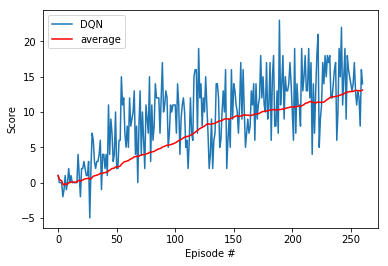

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [15]:
end = time.time()
elapsed = (end - start) / 60.0 # in minutes
print("Elapsed Time: {0:3.2f} mins.".format(elapsed))

Elapsed Time: 3.20 mins.


### 6. Testing the saved agent

Episode 1	Average Score: 22.00
Episode 2	Average Score: 17.50
Episode 3	Average Score: 13.00
Episode 4	Average Score: 10.00
Episode 5	Average Score: 11.00
Episode 6	Average Score: 11.83
Episode 7	Average Score: 12.43
Episode 8	Average Score: 13.00
Episode 9	Average Score: 13.00
Episode 10	Average Score: 12.90


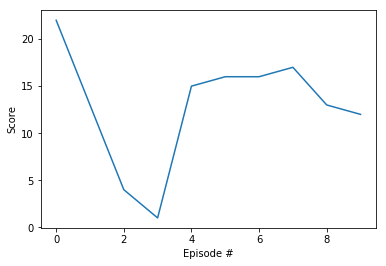


Elapsed Time: 4.98 mins.


In [16]:
start = time.time()

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=42)

# load the weights from file
checkpoint = 'checkpoint.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the env
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # is episode done?

        score += reward                                # update the score
        state = next_state                             # set state to next state
        if done:                                       # are we done yet?
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


end = time.time()
elapsed = (end - start) / 60.0 # in minutes
print("\nElapsed Time: {0:3.2f} mins.".format(elapsed))

When finished, you can close the environment.

In [17]:
env.close()

### 7. Further Refinements
There are several refinements to the existing ones that could add up to the performance of our smart DQN agent. Based on our existing setup, it is much likely that playing further with the hyperparameters we might came up with an agent that could learn faster.
However, the agent could greatly benefit from additional RL-specific refinements which we could introduce to our existing setup.
More specifically:
* Prioritized learning could be used so rather than randomly sampling SARS tuples from our experience buffer, we could revisit more frequently the SARS tuples that better relate to rational actions over specific states.
* A Double-DQN could be used to address the DQN problem of action value overestimation
* The QNetwork pytorch model could be changed to adapt a dueling DQN architecture, which incorporates two streams. One for the state-values function and another for the advantage-values function.